# Day 02 - Homework
## Importing Data and saving it as a Dataframe

In [ ]:
import pandas as pd

# only once
# read the data from the csv files (url = https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/blob/main/umsatzdaten_gekuerzt.csv)
data_umsatzdaten_gekuerzt = pd.read_csv("https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv")
# read the data from the csv files (url = https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/blob/main/kiwo.csv)
data_kiwo = pd.read_csv("https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv")
# read the data from the csv files (url = https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/blob/main/wetter.csv)
data_weather = pd.read_csv("https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv")

# save data_weather as a csv file
data_weather.to_csv("_data/wetter.csv", index=False)

# save kiwo.csv as a csv file
data_kiwo.to_csv("_data/kiwo.csv", index=False)

# save umsatzdaten_gekuerzt.csv as a csv file in folder _data
data_umsatzdaten_gekuerzt.to_csv("_data/umsatzdaten_gekuerzt.csv", index=False)

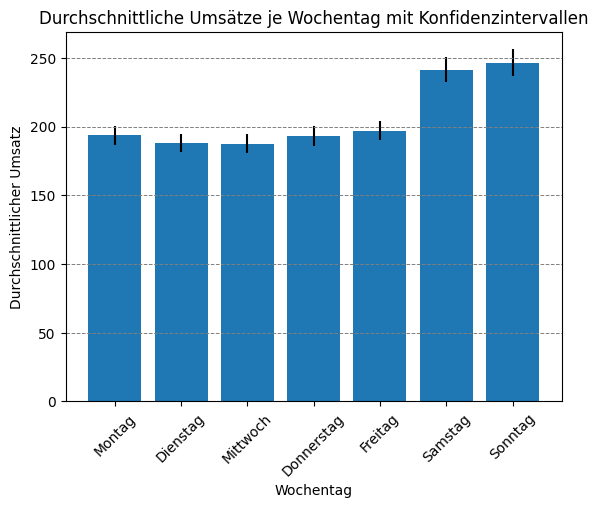

In [11]:
import pandas as pd

# read the data from the csv files (umsatzdaten_gekuerzt)
data_umsatzdaten_gekuerzt = pd.read_csv("_data/umsatzdaten_gekuerzt.csv")


# mit Hilfe eines Balkendiagramms den Zusammenhang der durschnittlichen Umsätze je Wochentag darstellt (column names: Datum (2013-07-01), Warengruppe, Umsatz)
import matplotlib.pyplot as plt
import numpy as np

# get the average sales per weekday 
data_umsatzdaten_gekuerzt["Datum"] = pd.to_datetime(data_umsatzdaten_gekuerzt["Datum"])

# get the weekday
data_umsatzdaten_gekuerzt["Wochentag"] = data_umsatzdaten_gekuerzt["Datum"].dt.day_name()

# get the average sales per weekday
average_sales_per_weekday = data_umsatzdaten_gekuerzt.groupby("Wochentag")["Umsatz"].mean()

# get the standard deviation of the sales per weekday
std_sales_per_weekday = data_umsatzdaten_gekuerzt.groupby("Wochentag")["Umsatz"].std()

# get the number of sales per weekday
count_sales_per_weekday = data_umsatzdaten_gekuerzt.groupby("Wochentag")["Umsatz"].count()

# calculate the standard error of the mean
sem_sales_per_weekday = std_sales_per_weekday / np.sqrt(count_sales_per_weekday)

# order the weekdays from Monday to Sunday
ordered_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
average_sales_per_weekday = average_sales_per_weekday.reindex(ordered_weekdays)
sem_sales_per_weekday = sem_sales_per_weekday.reindex(ordered_weekdays)

# plot the average sales per weekday with confidence intervals and dotted lines
plt.bar(average_sales_per_weekday.index, average_sales_per_weekday.values, yerr=1.96 * sem_sales_per_weekday)
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittlicher Umsatz")
plt.title("Durchschnittliche Umsätze je Wochentag mit Konfidenzintervallen")
plt.xticks(np.arange(7), ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"], rotation=45)

# add horizontal lines at 50, 100, 150, 200, 250
for y in [50, 100, 150, 200, 250]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

plt.show()

# calculate average Umsatz on Monday
average_sales_monday = data_umsatzdaten_gekuerzt[data_umsatzdaten_gekuerzt["Wochentag"] == "Monday"]["Umsatz"].mean()
# calculate average Umsatz on Tuesday
average_sales_tuesday = data_umsatzdaten_gekuerzt[data_umsatzdaten_gekuerzt["Wochentag"] == "Tuesday"]["Umsatz"].mean()
# calculate average Umsatz on Wednesday
average_sales_wednesday = data_umsatzdaten_gekuerzt[data_umsatzdaten_gekuerzt["Wochentag"] == "Wednesday"]["Umsatz"].mean()
# calculate average Umsatz on Thursday
average_sales_thursday = data_umsatzdaten_gekuerzt[data_umsatzdaten_gekuerzt["Wochentag"] == "Thursday"]["Umsatz"].mean()
# calculate average Umsatz on Friday
average_sales_friday = data_umsatzdaten_gekuerzt[data_umsatzdaten_gekuerzt["Wochentag"] == "Friday"]["Umsatz"].mean()
# calculate average Umsatz on Saturday
average_sales_saturday = data_umsatzdaten_gekuerzt[data_umsatzdaten_gekuerzt["Wochentag"] == "Saturday"]["Umsatz"].mean()
# calculate average Umsatz on Sunday
average_sales_sunday = data_umsatzdaten_gekuerzt[data_umsatzdaten_gekuerzt["Wochentag"] == "Sunday"]["Umsatz"].mean()

# create a table with the average sales for each weekday
table_average_sales_per_weekday = pd.DataFrame({
    "Wochentag": ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"],
    "Durchschnittlicher Umsatz": [average_sales_monday, average_sales_tuesday, average_sales_wednesday, average_sales_thursday, average_sales_friday, average_sales_saturday, average_sales_sunday]
})

# delete average_sales_monday, average_sales_tuesday, average_sales_wednesday, average_sales_thursday, average_sales_friday, average_sales_saturday, average_sales_sunday
del average_sales_monday, average_sales_tuesday, average_sales_wednesday, average_sales_thursday, average_sales_friday, average_sales_saturday, average_sales_sunday